In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.math_tool as mt
import src.img_tool as it
import src.apertures as apertures

%load_ext autoreload
%autoreload 2
%matplotlib ipympl

π, λ = np.pi, 0.532
k = 2*π/λ
D = 30e3
Nx, Ny = 1024, 1024
x, y = np.linspace(-Nx//2, Nx//2, Nx, endpoint=False), np.linspace(-Ny//2, Ny//2, Ny, endpoint=False)
x, y = np.meshgrid(x, y, indexing='ij')
def cal_distance(x, y, D): #calculate distance from set x, y, to (0, 0, D)
    return np.sqrt( D**2 + mt.r(x, y, 0, 0)**2)

In [3]:
test_phase = np.linspace(0, 2*π, 128, endpoint=False)
dist = cal_distance(x, y, D)
phase = np.mod(k*(dist - D), 2*π)[..., None] - test_phase #Nx, Ny, Nθ
cos_phase = np.cos(phase)

In [4]:
mask = apertures.block_edge_mask(Nx, Ny, radius=500)
aperture = (cos_phase>0) * mask[..., None]# Nx, Ny, Nθ

In [5]:
selective_contribution_E = (cos_phase/dist[..., None] * aperture).sum(axis=(0,1)) # Nθ
#since modeled as spherical wave, / dist is drop off
E2 = selective_contribution_E**2
print(E2.max())
print(E2.min())

72.45672562998057
63.64513095827128


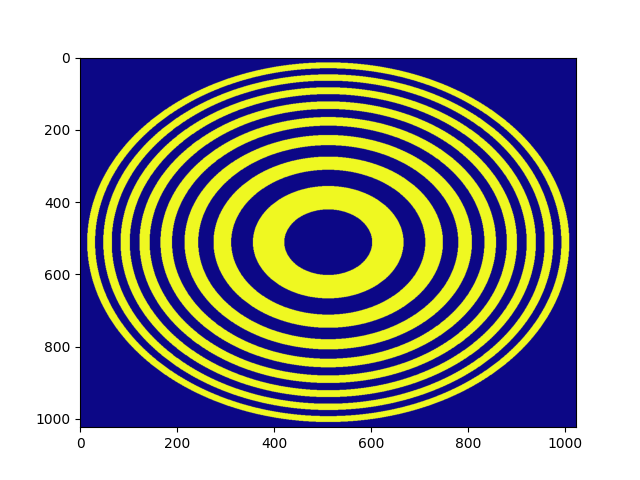

In [6]:
save_path = './aperture/tmp/phase_f30mm'
aperture = aperture[..., E2.argmax()]

plt.imshow(aperture.T, aspect='auto', cmap='plasma')
#plt.savefig(f'{save_path}/A.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
np.save(f'{save_path}/A.npy', aperture)

In [51]:
theta = np.arctan(500/D)
obliquity_factor = (1+np.cos(theta))/2
print(obliquity_factor)

0.9999305700198
